# Red Wine Quality Prediction Model

#### Team 8 - Jiazu Zhang - jz944
#### Team 8 - Mengjia Wei - mw1296
#### Team 8 - Ahmed Khair - afk46

# 3. Analysis of the dataset and Trained Model

### 3.1 Load dataset and packages

In [69]:
# Loading the necessary packages
import random
from seaborn.palettes import color_palette
random.seed(9001)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

# Load the dataset
gr8_wq= pd.read_csv("dataset/winequality-red.csv",header=0)

### 3.2 Show first rows of dataset and describe the dataframe

In [70]:
# Show first 10 rows of the dataframe
gr8_wq.head(11)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4              0.70         0.00             1.9      0.076   
1             7.8              0.88         0.00             2.6      0.098   
2             7.8              0.76         0.04             2.3      0.092   
3            11.2              0.28         0.56             1.9      0.075   
4             7.4              0.70         0.00             1.9      0.076   
5             7.4              0.66         0.00             1.8      0.075   
6             7.9              0.60         0.06             1.6      0.069   
7             7.3              0.65         0.00             1.2      0.065   
8             7.8              0.58         0.02             2.0      0.073   
9             7.5              0.50         0.36             6.1      0.071   
10            6.7              0.58         0.08             1.8      0.097   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  11.0                  34.0   0.9978  3.51       0.56   
1                  25.0                  67.0   0.9968  3.20       0.68   
2                  15.0                  54.0   0.9970  3.26       0.65   
3                  17.0                  60.0   0.9980  3.16       0.58   
4                  11.0                  34.0   0.9978  3.51       0.56   
5                  13.0                  40.0   0.9978  3.51       0.56   
6                  15.0                  59.0   0.9964  3.30       0.46   
7                  15.0                  21.0   0.9946  3.39       0.47   
8                   9.0                  18.0   0.9968  3.36       0.57   
9                  17.0                 102.0   0.9978  3.35       0.80   
10                 15.0                  65.0   0.9959  3.28       0.54   

    alcohol  quality  
0       9.4        5  
1       9.8        5  
2       9.8        5  
3       9.8        6  
4       9.4        5  
5       9.4        5  
6       9.4        5  
7      10.0        7  
8       9.5        7  
9      10.5        5  
10      9.2        5

In [71]:
# Describe dataset
gr8_wq.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

### 3.3 Create pairplot for whole dataset to observe the distributions and correlations

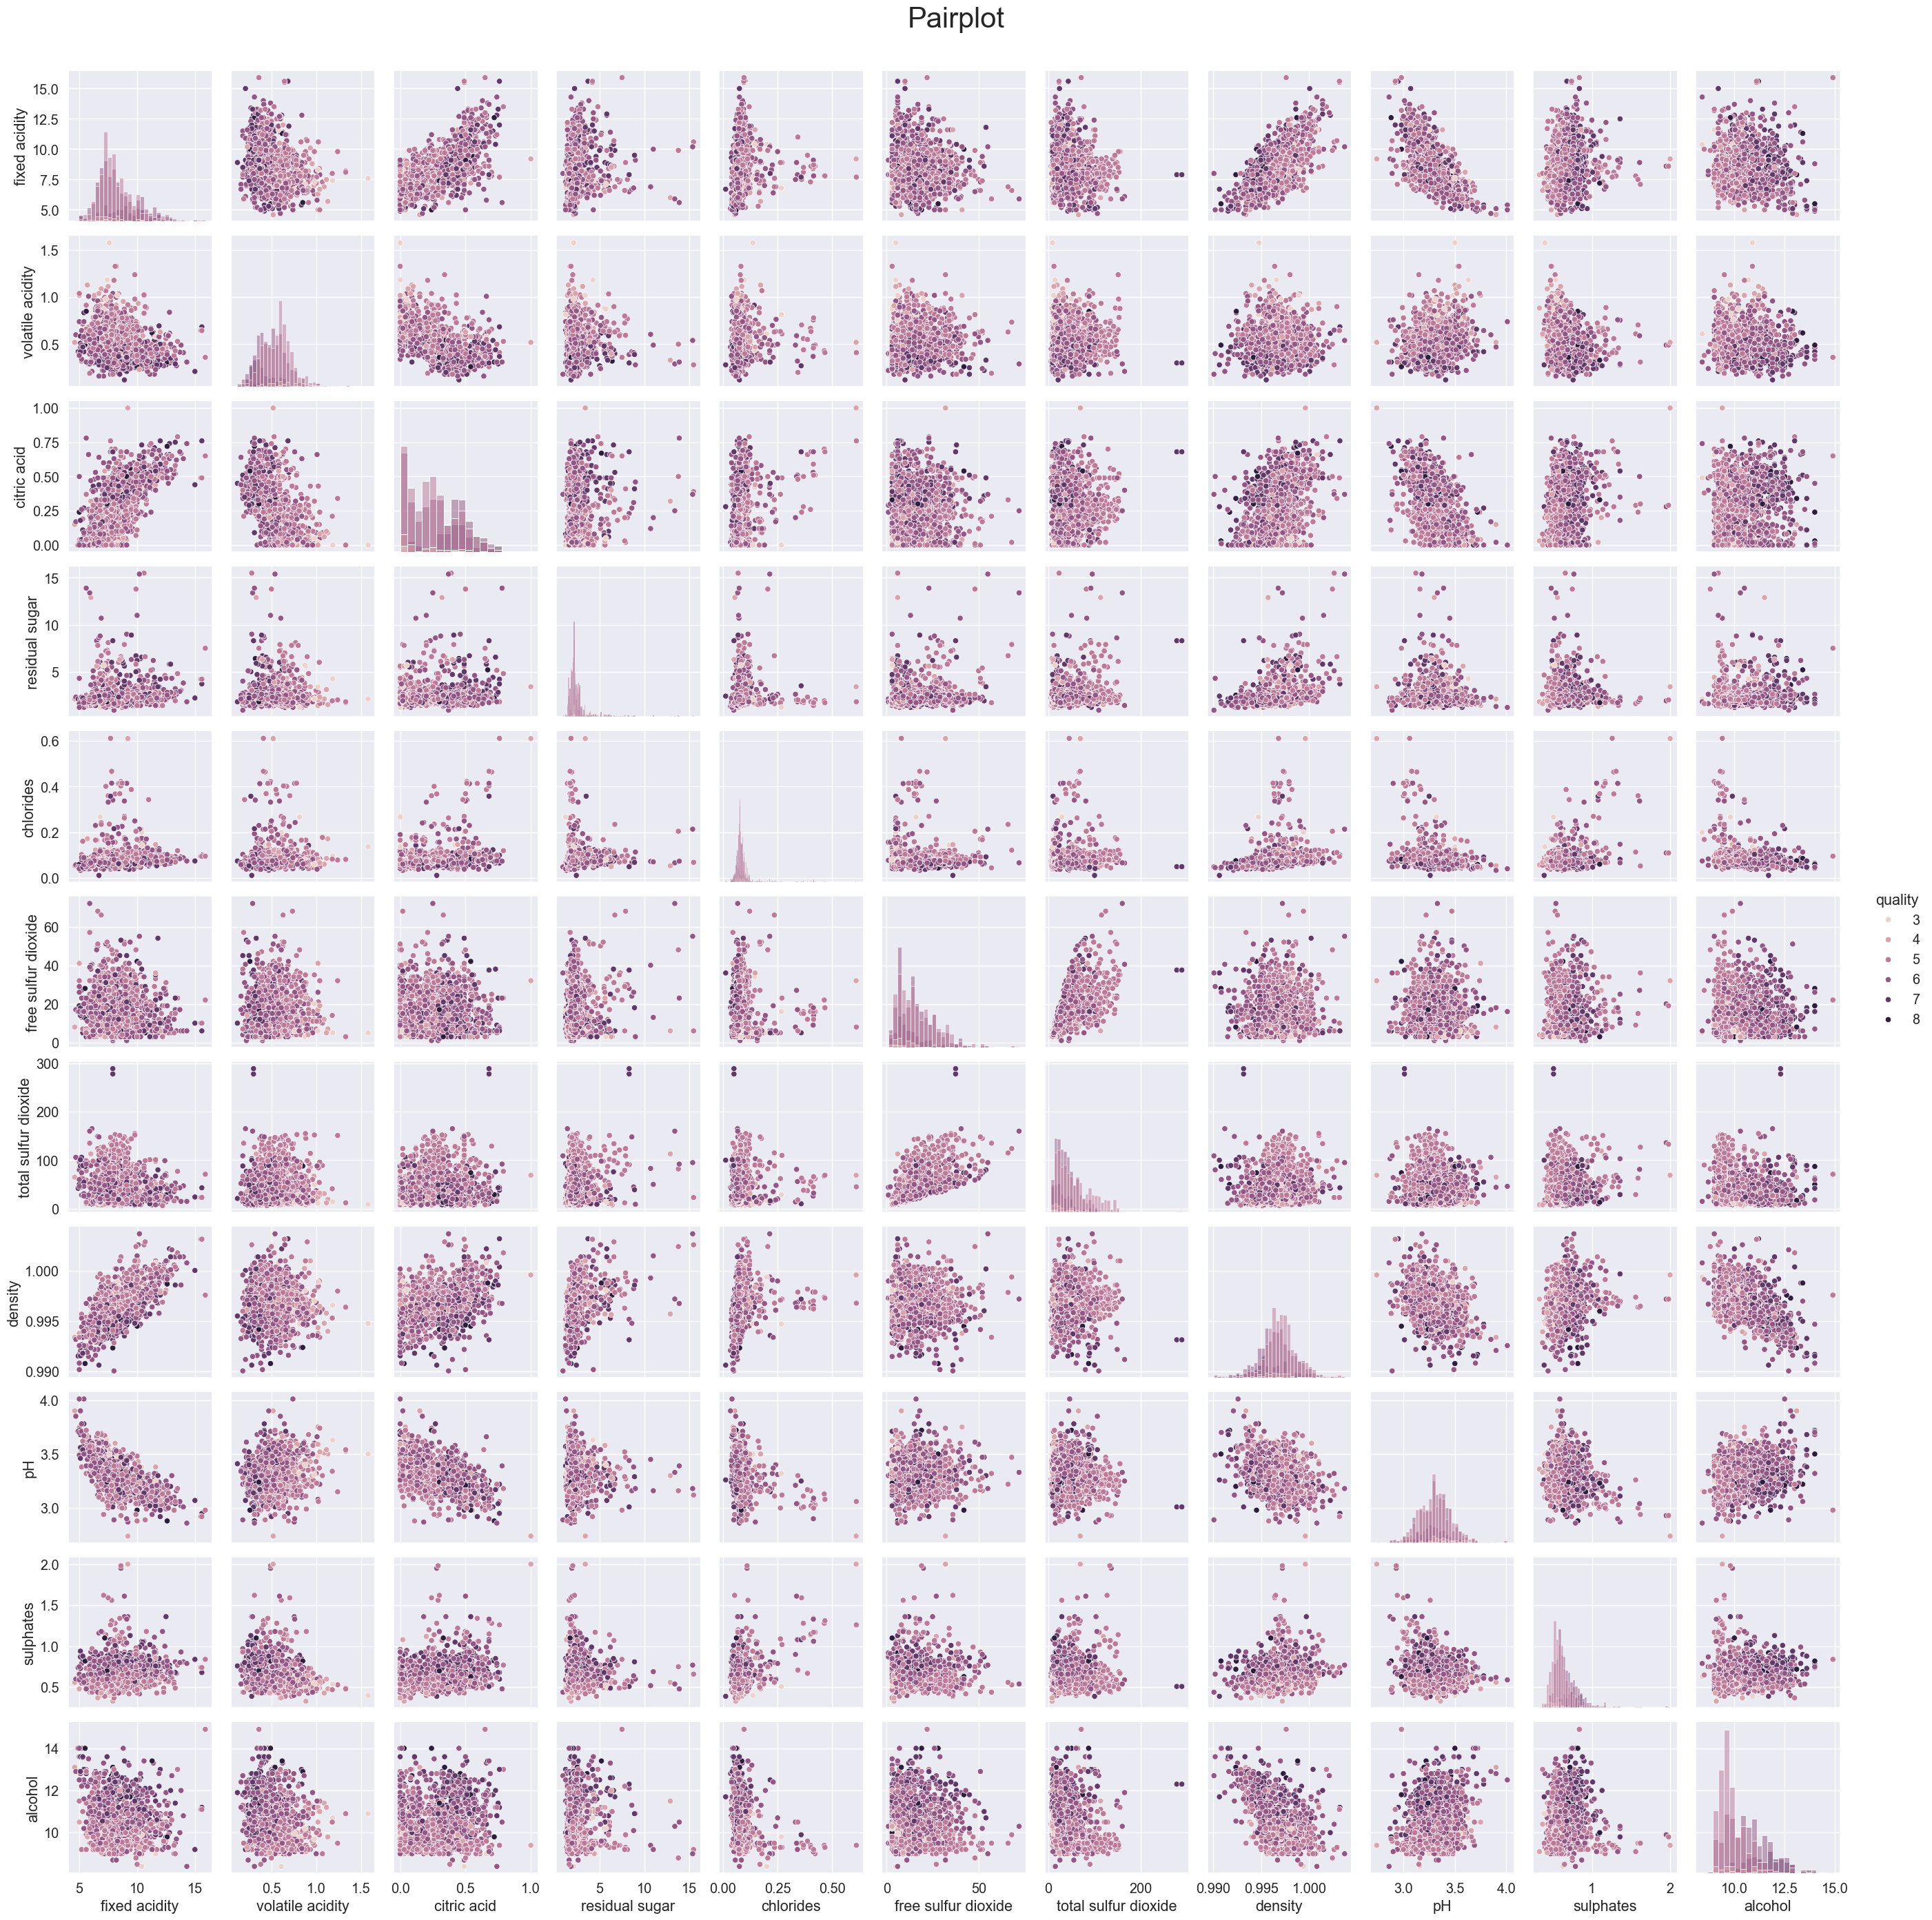

In [72]:
# create pairplot by quality
pp = sns.pairplot(gr8_wq, hue="quality",diag_kind="hist")
pp.fig.suptitle("Pairplot", fontsize=30, y=1.02);

### 3.4 Show correlations of wine features and wine quality scores

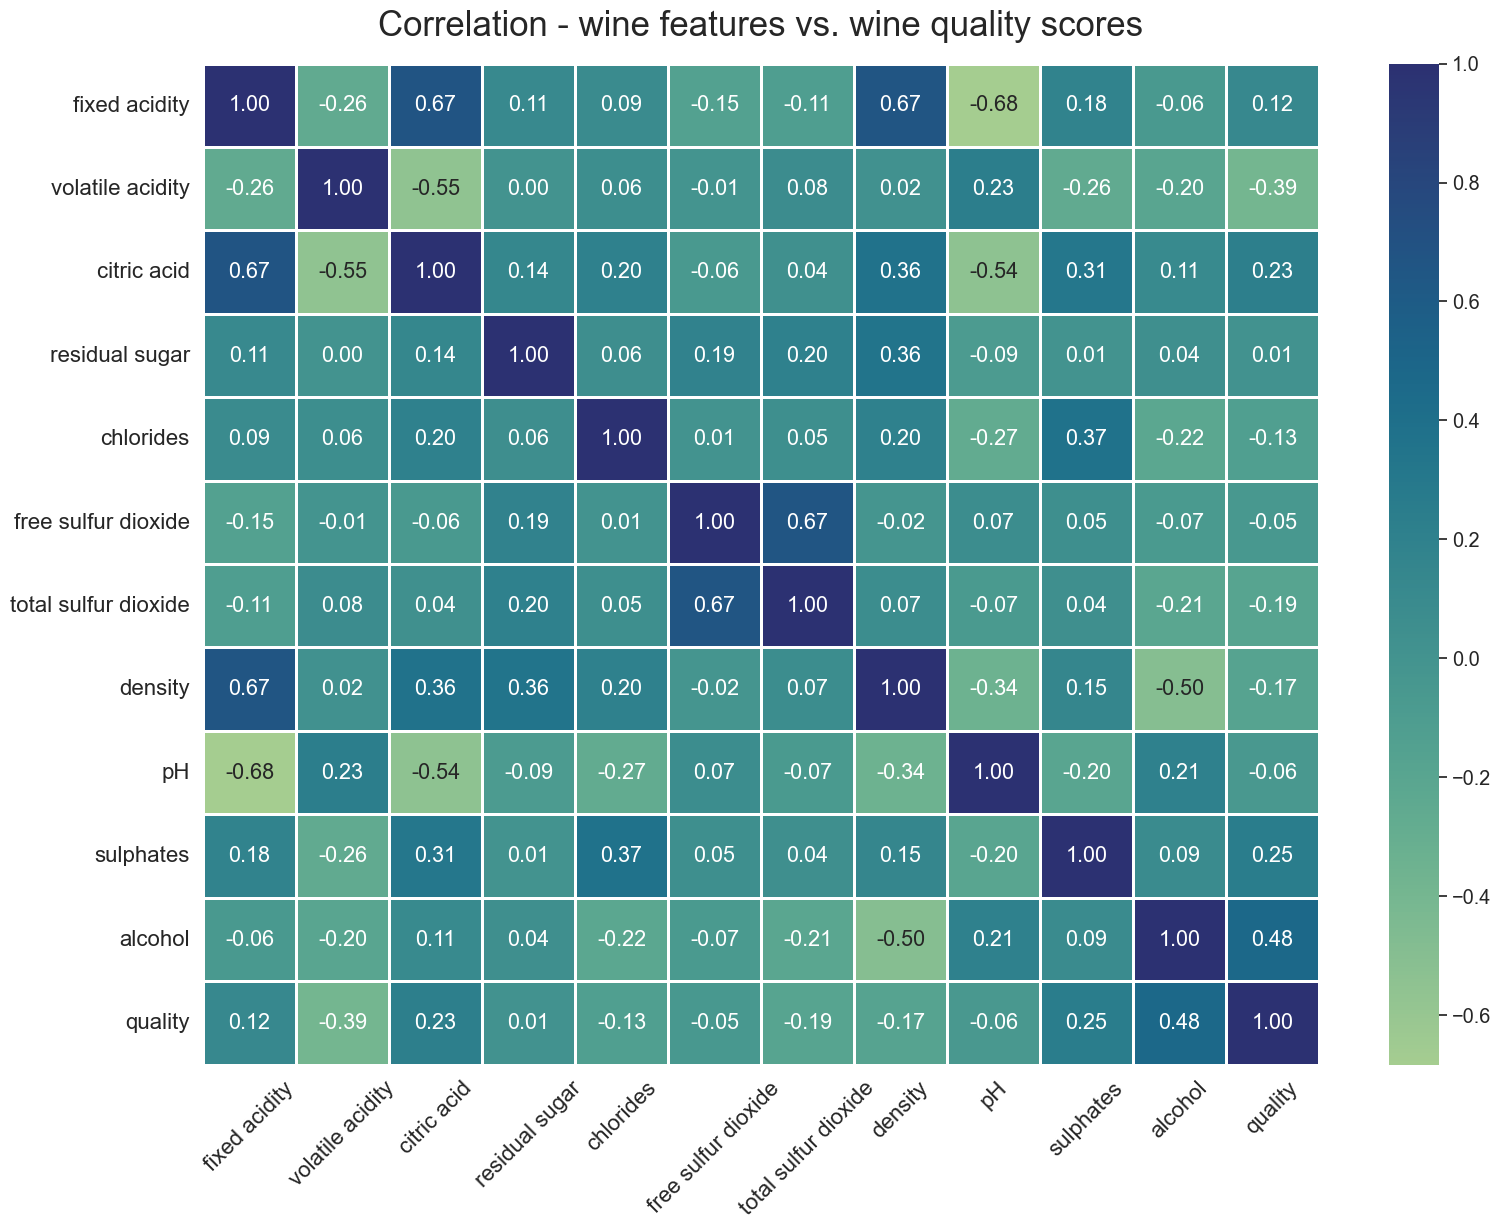

In [73]:
# plot correltion heatmap
plt.figure(figsize=(18,13))
plt.title("Correlation - wine features vs. wine quality scores", fontsize=25, pad=20)
sns.set(font_scale=1.3)
corr = sns.heatmap(gr8_wq.corr(), annot=True, fmt='.2f', linewidths=2, cmap="crest")
corr.set_yticklabels(corr.get_ymajorticklabels(), fontsize = 16);
corr.set_xticklabels(corr.get_xmajorticklabels(), fontsize = 16, rotation=45);


##### The correlation heatmap above shows that "Alcohol", "Sulphates", "Citric acid" these three features have high positive correlations with "Wine quality score"; "Volatile acidity", “Total sulfur dioxide" have the high negative correlation with "Wine quality score".

### 3.5 Graph distributions of wine features ("Alcohol", "Sulphates", "Citric acid","Volatile acidity", “Total sulfur dioxide","Chlorides") by wine quality scores

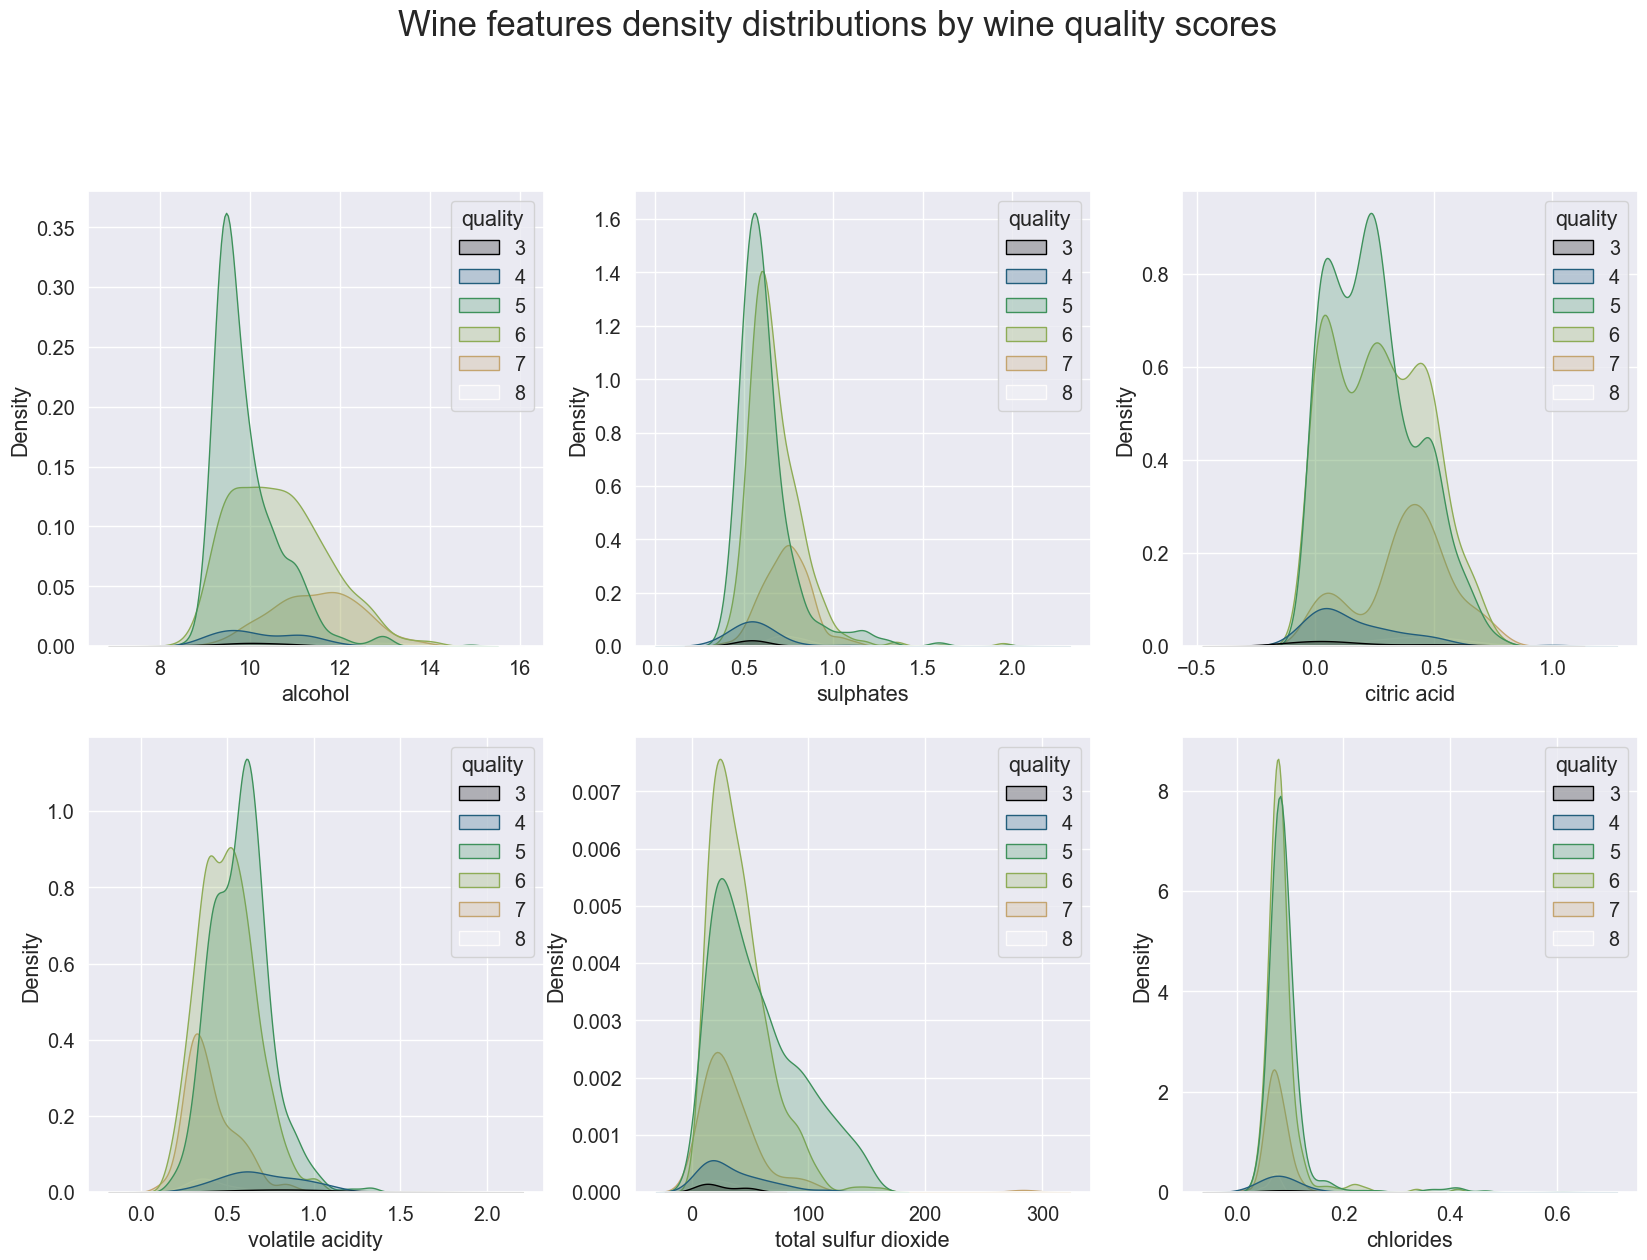

In [74]:
# Wine features distribution plots by wine quality score using Kernel density estimation (KDE)
fig, axes = plt.subplots(2, 3, figsize=(20,13))
fig.suptitle('Wine features density distributions by wine quality scores',fontsize=25, y=1.02)

sns.kdeplot(ax=axes[0, 0], data=gr8_wq, x="alcohol", hue="quality", fill=True, palette='gist_earth');
sns.kdeplot(ax=axes[0, 1], data=gr8_wq, x="sulphates", hue="quality", fill=True, palette='gist_earth');
sns.kdeplot(ax=axes[0, 2], data=gr8_wq, x="citric acid", hue="quality", fill=True, palette='gist_earth');
sns.kdeplot(ax=axes[1, 0], data=gr8_wq, x="volatile acidity", hue="quality", fill=True, palette='gist_earth');
sns.kdeplot(ax=axes[1, 1], data=gr8_wq, x="total sulfur dioxide", hue="quality", fill=True, palette='gist_earth');
sns.kdeplot(ax=axes[1, 2], data=gr8_wq, x="chlorides", hue="quality", fill=True, palette='gist_earth');



#### The distribution plots of above features reflect the same result as correlation heatmap: high quality wines have higher probability to have high level of Alcohol, Sulphates, Citric acid and Volatile acidity; low level of Total Sulfure dioxide. While low quality wines are in the opposite.

note that 2 = high quality, 1 = medium quality, 0 = low quality 

In [75]:
# # Convert "Quality" into Low/Medium/High
# gr8_wq['quality_cat'] = np.select([gr8_wq.quality >=7, gr8_wq.quality>=5 , gr8_wq.quality< 5], 
#                     [2,1,0], 
#                     default=None)
# gr8_wq['quality_cat'] = gr8_wq['quality_cat'].astype('category',copy=False)

In [76]:
# # pairplot by quality category
# pp2 = sns.pairplot(gr8_wq, hue="quality_cat", diag_kind="hist")
# pp2.fig.suptitle("Pairplot", fontsize=30, y=1.02);

In [77]:
# # Wine features distribution plots by wine quality cateogries using Kernel density estimation (KDE)
# fig2, axes2 = plt.subplots(2, 3, figsize=(20,13))
# fig2.suptitle('Wine features density distributions by wine quality category',fontsize=25, y=1.02)

# sns.kdeplot(ax=axes2[0, 0], data=gr8_wq, x="alcohol", hue="quality_cat", fill=True, palette='gist_earth');
# sns.kdeplot(ax=axes2[0, 1], data=gr8_wq, x="sulphates", hue="quality_cat", fill=True, palette='gist_earth');
# sns.kdeplot(ax=axes2[0, 2], data=gr8_wq, x="citric acid", hue="quality_cat", fill=True, palette='gist_earth');
# sns.kdeplot(ax=axes2[1, 0], data=gr8_wq, x="volatile acidity", hue="quality_cat", fill=True, palette='gist_earth');
# sns.kdeplot(ax=axes2[1, 1], data=gr8_wq, x="total sulfur dioxide", hue="quality_cat", fill=True, palette='gist_earth');
# sns.kdeplot(ax=axes2[1, 2], data=gr8_wq, x="chlorides", hue="quality_cat", fill=True, palette='gist_earth');



### Second Section: Modeling

In [78]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")


##### Split the Dataset

split out target variable

In [79]:

gr8_X = gr8_wq.drop(['quality','quality_cat'], axis = 1)

gr8_y = gr8_wq['quality_cat']



In [80]:
gr8_X

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1599 rows x 11 columns]

In [81]:
gr8_y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

split out train test dataset

In [82]:
gr8_X_train, gr8_X_test, gr8_y_train, gr8_y_test = train_test_split(gr8_X, gr8_y, stratify=gr8_y,test_size=0.20)


Note: Due to the small amount of High quality and low quality (8 & 3), the train test split is performed with stratify split instead of random split to ensure there are samiliar percentage of those minor labels in the test dataset

##### Baseline model


Get the baseline model accuracy

Note: The baseline model we chose is logistic regression, no tuning performed

In [83]:
# Import Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Initializing the LogisticRegression Model
model = LogisticRegression()

# Training the model
model.fit(gr8_X_train, gr8_y_train)

# Making predictions on the datatest
gr8_y_pred = model.predict(gr8_X_test)

# Getting the score

LogisticRegression_score = model.score(gr8_X_test, gr8_y_test)
print("The accuracy is:", LogisticRegression_score)

The accuracy is: 0.553125


Model coefficient

In [84]:
coefficient = model.coef_

In [85]:
coefficient_df = pd.DataFrame(coefficient, index = model.classes_, columns = gr8_X_train.columns)
coefficient_df.index.name = "quality"
coefficient_df

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             0.067942          0.073006    -0.012764        0.061425   
4            -0.228889          0.237313    -0.126594        0.277913   
5             0.206450          0.943529    -0.453357       -0.099189   
6             0.118011         -0.400165     0.083803       -0.103738   
7             0.127973         -0.768955     0.460696       -0.065319   
8            -0.291487         -0.084729     0.048216       -0.071092   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.010225             0.075731             -0.034026 -0.006234   
4        -0.011500            -0.034861              0.003799  0.022120   
5         0.108902            -0.006237              0.026014  0.467504   
6        -0.018482             0.020496              0.005914 -0.094054   
7        -0.075128             0.026533             -0.006653 -0.339183   
8        -0.014017            -0.081662              0.004952 -0.050154   

               pH  sulphates   alcohol  
quality                                 
3       -0.010061  -0.020839 -0.249801  
4        0.170797  -0.082843  0.026391  
5        1.678355  -0.353553 -0.693206  
6       -0.369139   0.196136  0.216920  
7       -1.280072   0.221368  0.454996  
8       -0.189879   0.039732  0.244700

Coefficient visualization

<Axes: >

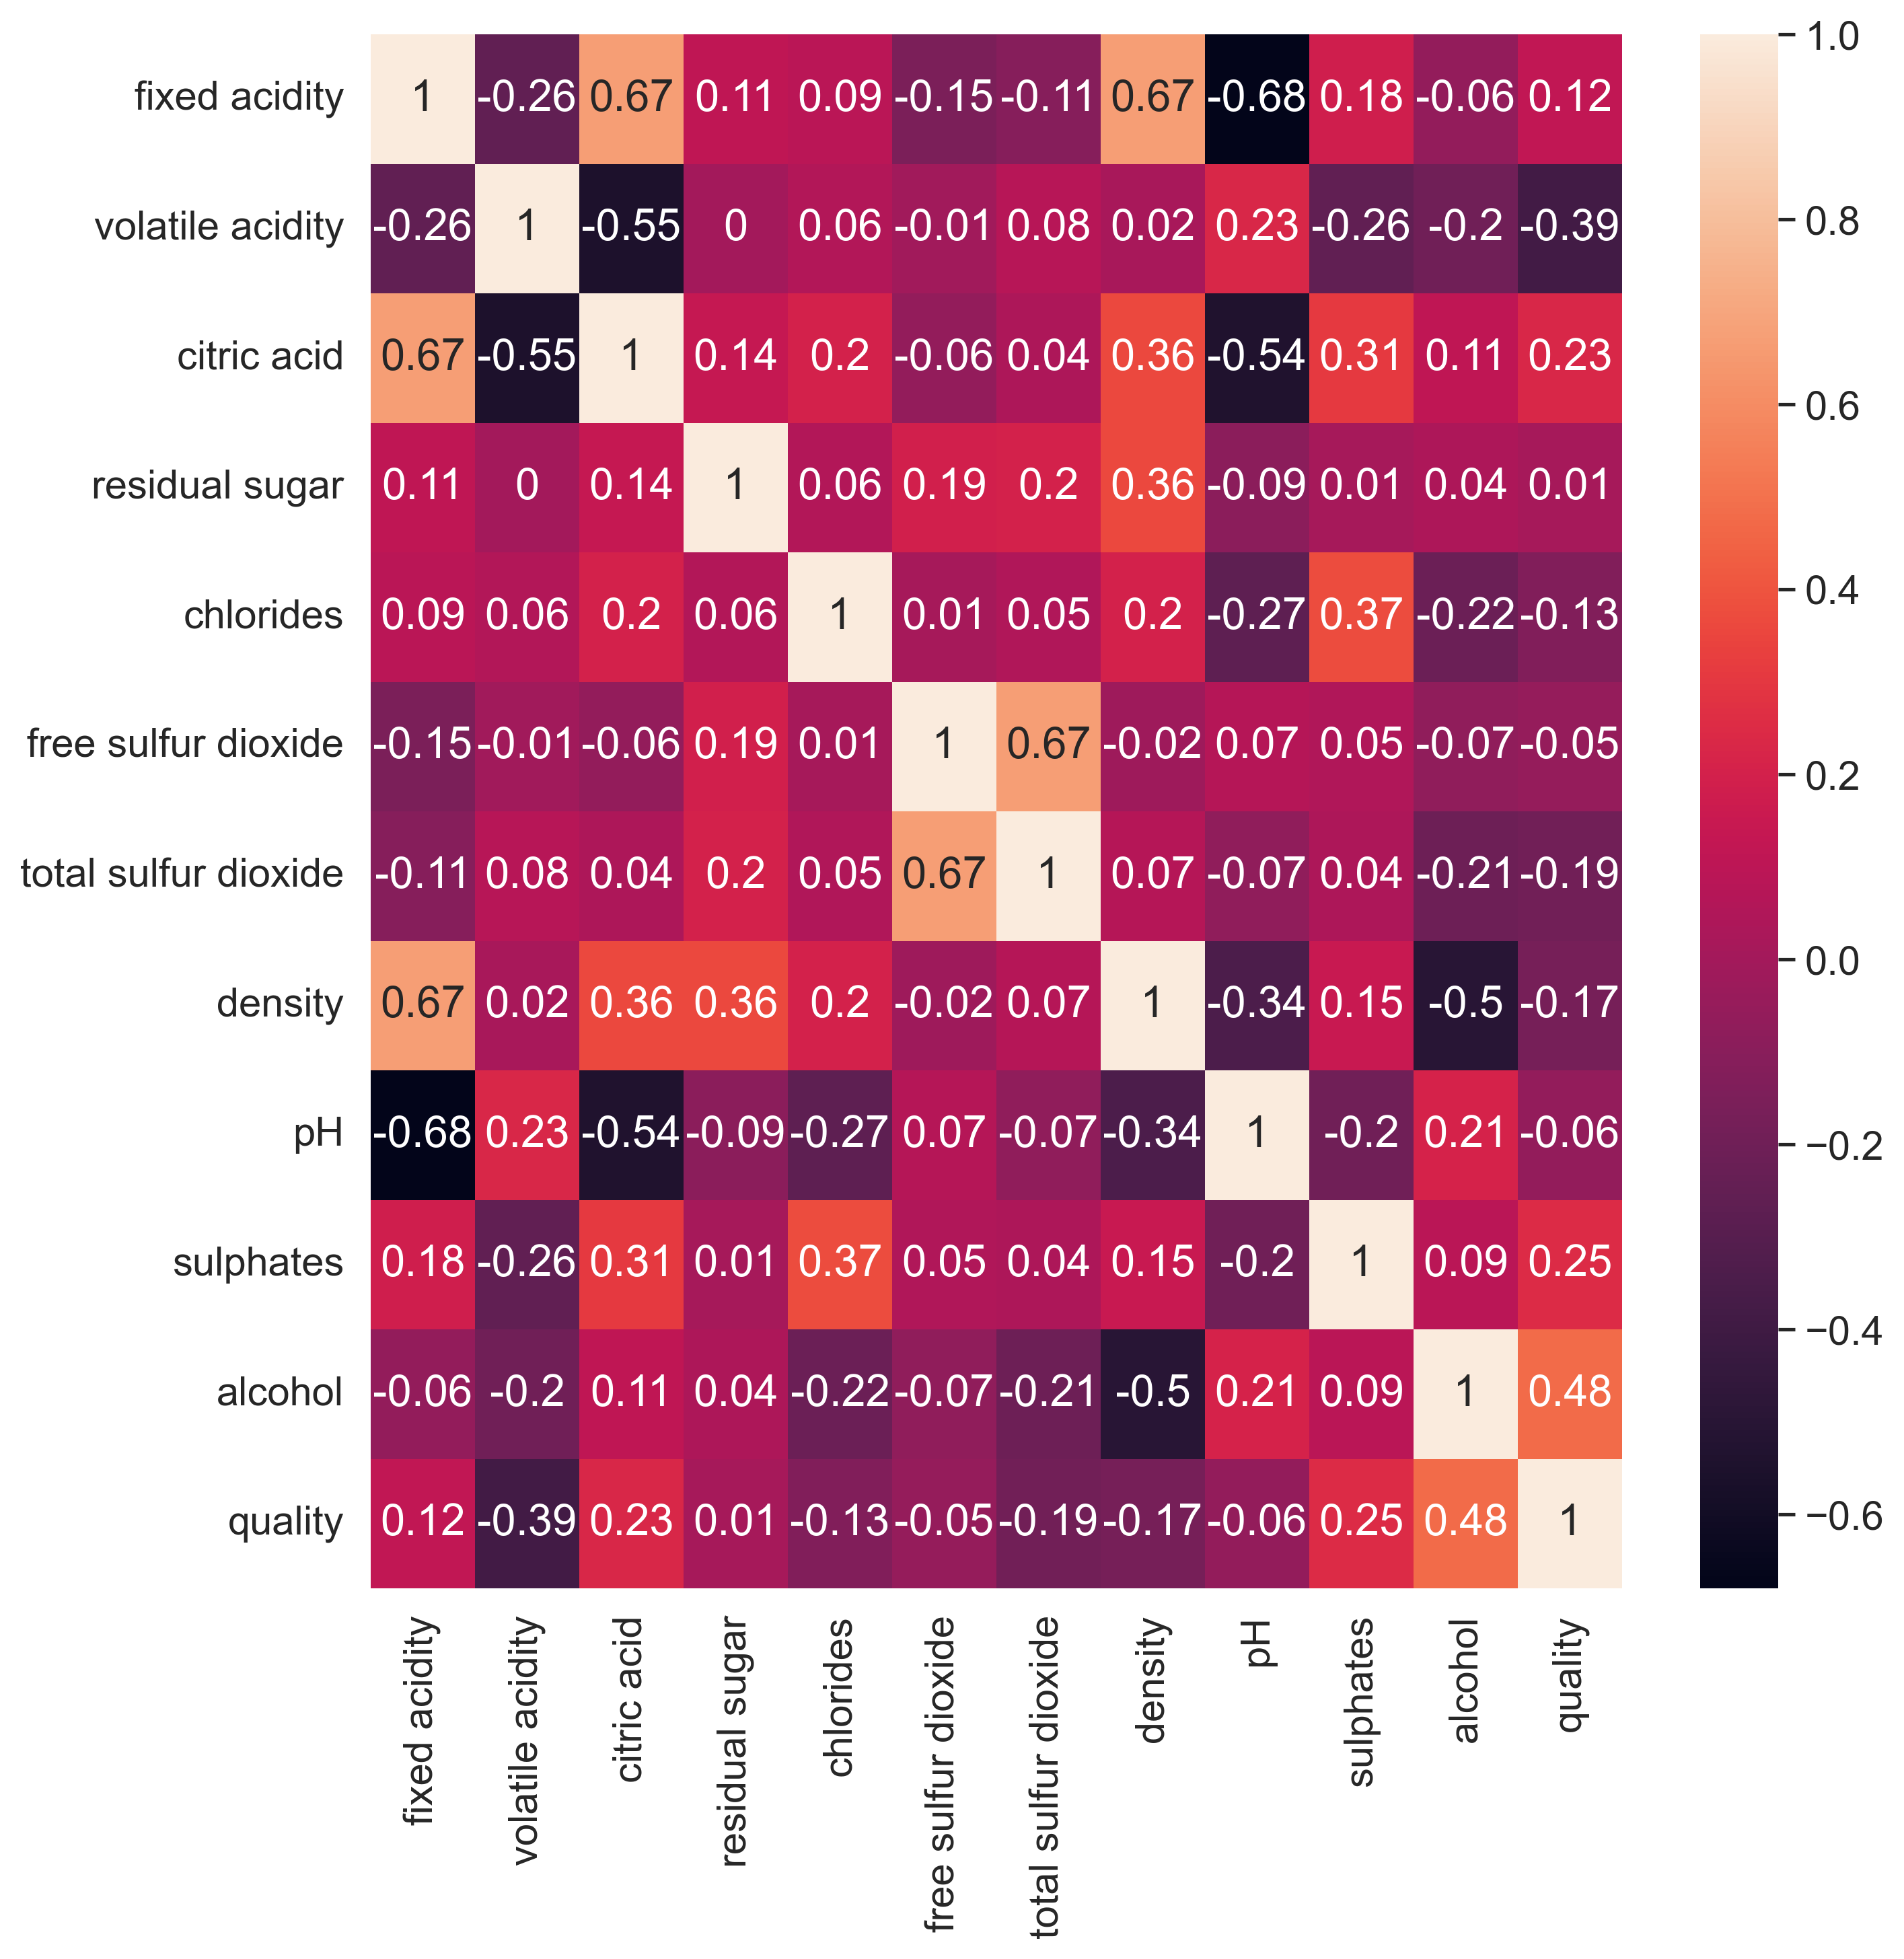

In [86]:
plt.figure(figsize=(10, 10),dpi=300)
correlation_matrix = gr8_wq.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
#plt.savefig('/Users/Ahmed/Documents/Dsan6700/heatmap.jpg',dpi=300)

##### Evaluate base models

Test performance of base models

Note: Due to the new version of the XGBoost model's issue, y_train must be encoded.

In [87]:
# #encode y_train
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)

In [88]:
# list of models
def base_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models["KN"] = KNeighborsClassifier()
    models["SVC"] = svm.SVC()
    models["Tree"] = DecisionTreeClassifier()
    models["Random Forest"] = RandomForestClassifier()
    models["Bagging"] = BaggingClassifier()
    models["GBM"] = GradientBoostingClassifier()
    models["GNB"] = GaussianNB()
    # models["XGB"] = XGBClassifier()
    return models

In [89]:
# Function to evaluate the list of models
def eval_models(model):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = -cross_val_score(model, gr8_X_train, gr8_y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [90]:
# evaluate the models and print results
models = base_models()
results, names = list(), list() 
for name, model in models.items():
  scores = eval_models(model)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))

# store results in dataframe
classmod = pd.DataFrame(np.transpose(results), columns = ["lr","KN","SVC","Tree","Random Forest","Bagging","GBM", "GNB"])
classmod = pd.melt(classmod.reset_index(), id_vars='index',value_vars=["lr","KN","SVC","Tree","Random Forest","Bagging","GBM", "GNB"])

>lr 0.453 (0.045)
>KN 0.583 (0.054)
>SVC 0.554 (0.052)
>Tree 0.464 (0.053)
>Random Forest 0.344 (0.050)
>Bagging 0.381 (0.054)
>GBM 0.398 (0.059)
>GNB 0.522 (0.067)


Visualize base models' performance

In [91]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

fig = px.box(classmod, x="variable", y="value",color="variable",points='all',
labels={"variable": "Machine Learning Model",
        "value": "RMS Error"
        },title="Model Performance")
fig.show()

### Build and apply Stack model base on the performance of base models

In [92]:
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier,RandomForestClassifier, StackingClassifier


Select base models to stacking model

Note that the base models with best performance are Random Forest, Bagging and GBM

In [93]:
def get_stacking():
# define the base models
    level0 = list()
    level0.append(('Bagging', BaggingClassifier()))
    level0.append(('RF', RandomForestClassifier()))
    level0.append(('GBM', GradientBoostingClassifier()))
# define meta learner model
    level1 = LogisticRegression()
# define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model
def base_models():
    models = dict()
    models["Bagging"] = BaggingClassifier()
    models["Random Forest"] = RandomForestClassifier()
    models["GBM"] = GradientBoostingClassifier()
    models["Stacked Model"] = get_stacking()
    return models

New models evaluation

In [94]:
def eval_models(model):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = -cross_val_score(model, gr8_X_train, gr8_y_train,
    scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1,
    error_score='raise')
    return scores
models = base_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = eval_models(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
classmod = pd.DataFrame(np.transpose(results), columns = ["Bagging","Random Forest","GBM","Stacked Model"])
classmod = pd.melt(classmod.reset_index(),
id_vars='index',value_vars=["Bagging","Random Forest","GBM","Stacked Model"])
fig = px.box(classmod, x="variable", y="value",color="variable",points='all',
labels={"variable": "Machine Learning Model","value": "RMS Error"},title="Model Performance")
fig.show()
# fig.write_image("Project/Boxplot-candidate.jpeg",engine="kaleido",format="png",width=1600, height=700, scale=0.75)fig.show()

>Bagging 0.381 (0.058)
>Random Forest 0.350 (0.048)
>GBM 0.399 (0.059)
>Stacked Model 0.344 (0.043)


### Export Pickle model and use the model to predict y_test from x_test

In [95]:
import pickle
#library loaded
gr8_y_train = gr8_y_train.ravel()
level0 = list()
level0.append(('Bagging', BaggingClassifier()))
level0.append(('RF', RandomForestClassifier()))
level0.append(('GBM', GradientBoostingClassifier()))
level1 = LogisticRegression()
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
model.fit(gr8_X_train, gr8_y_train)
#Save to file in the current working directory
pkl_filename = "AssignmentPickle.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)
# Load the model from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
score = pickle_model.score(gr8_X_test, gr8_y_test)
print("Test score: {0:.2f} %".format(100 * score))
gr8_Y_predict = pickle_model.predict(gr8_X_test)

Test score: 67.50 %


Get the confusion matrix

In [96]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
predictions = pd.DataFrame(gr8_Y_predict, columns=['predictions'])
predictions['actual'] = gr8_y_test
print(f'The confusion matrix for the model is: \n {confusion_matrix( gr8_y_test, gr8_Y_predict.ravel())}')

#Print the confusion matrix below

The confusion matrix for the model is: 
 [[  0   0   2   0   0   0]
 [  0   0   7   4   0   0]
 [  0   0 109  27   0   0]
 [  0   0  38  84   6   0]
 [  0   0   2  15  23   0]
 [  0   0   0   3   0   0]]


Visualize the confusion matrix

In [97]:
pd.Series(data =list(gr8_y_train)).value_counts()

5    545
6    510
7    159
4     42
8     15
3      8
Name: count, dtype: int64

In [98]:
gr8_y_test.value_counts()

quality
5    136
6    128
7     40
4     11
8      3
3      2
Name: count, dtype: int64

<Figure size 187.5x187.5 with 0 Axes>

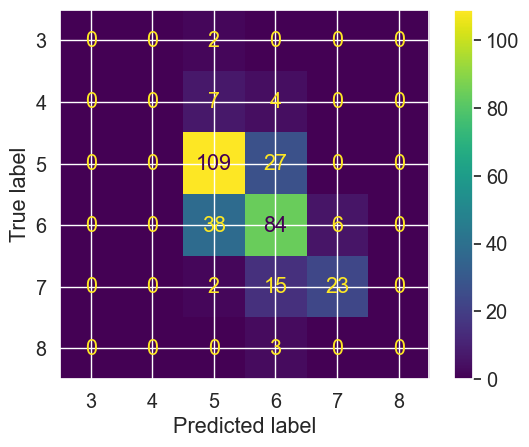

In [99]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from seaborn import set_palette

plt.figure(figsize=(2.5,2.5),dpi=75)
set_palette("Paired")

G8_conf_matrix = confusion_matrix(gr8_y_test, gr8_Y_predict)
ConfusionMatrixDisplay.from_estimator(pickle_model, gr8_X_test, gr8_y_test)

Add predicted value to the original dataset

In [100]:

gr8_wq['Predict_quality_cat'] = pickle_model.predict(gr8_X)

In [101]:
gr8_wq

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  Predict_quality_cat  
0         9.4        5                    5  
1         9.8        5                    5  
2         9.8        5                    5  
3         9.8        6                    6  
4         9.4        5                    5  
...       ...      ...                  ...  
1594     10.5        5                    5  
1595     11.2        6                    6  
1596     11.0        6                    6  
1597     10.2        5                    5  
1598     11.0        6                    6  

[1599 rows x 13 columns]